# Calculates aerodynamic resistance and canopy  temperature boundaries for each plot

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions as et
%matplotlib inline
import matplotlib.dates as mdates

## Bring in Data

In [2]:
Data = pd.read_pickle('.\DataFrames\TempAndMet.pkl')
Height = pd.read_pickle('./DataFrames/HeightEstimated.pkl')

In [3]:
Cultivars = ['Dash','Omaka']
Irrigations = ['High','Low','Mid']
Ic = 1.0
Icl = 1.0
Cp = 1013 #Heat capacity of air Joule/kg/oC
Albedo = 0.23
Lattitude = -43.38
LongitudeTZ = 185
LongitudeML = 360 - 172.28

In [4]:
DaylightIndex = Data.IncomingRadnMJ.where(Data.IncomingRadnMJ>0.002)
DaylightIndex.dropna(inplace=True)
DaylightIndex = DaylightIndex.index.tolist()

# Calculate Aerodynamic resistance for each plot

In [9]:
def SortFrame(Frame):
    Frame.sort_index(axis=1,inplace=True)
    Frame.sort_index(axis=0,inplace=False)

In [7]:
RaDF = pd.DataFrame(index = Data.index,columns=Height.columns)
SortFrame(RaDF)
for plot in Height.columns:
    RaDF.loc[:,plot] = [et.Ra(Data.loc[x,'Windspeed'][0],
                             1.2,
                             Height.loc[x.date(),plot]) for x in Data.index]  

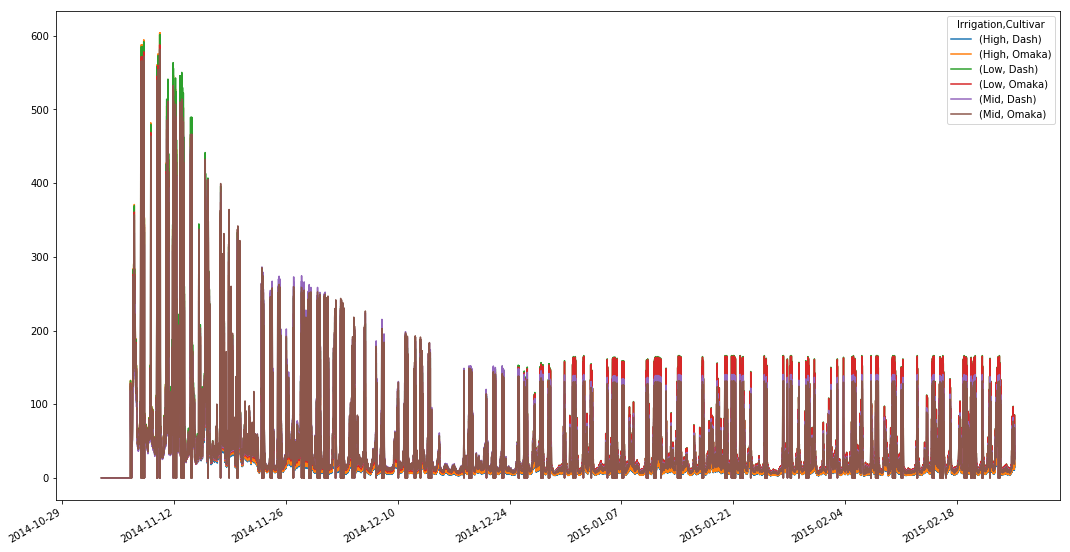

In [8]:
RaDF.groupby(axis=1,level = ['Irrigation','Cultivar']).mean().plot(figsize=(18,10))

# Calculate surface temperature boundaries

## Upper limit for surface temperature depression (Ts-TaUL)

In [13]:
TsTaULDF = pd.DataFrame(index = Data.index,columns=Height.columns)
SortFrame(TsTaULDF)
for plot in TsTaULDF.columns:
    TsTaULDF.loc[:,plot] = [et.TsTaUL(RaDF.loc[x,plot],
                                  Ic,
                                  Data.loc[x,'RnW'][0],
                                  Data.loc[x,'q'][0],
                                  Cp) for x in Data.index]

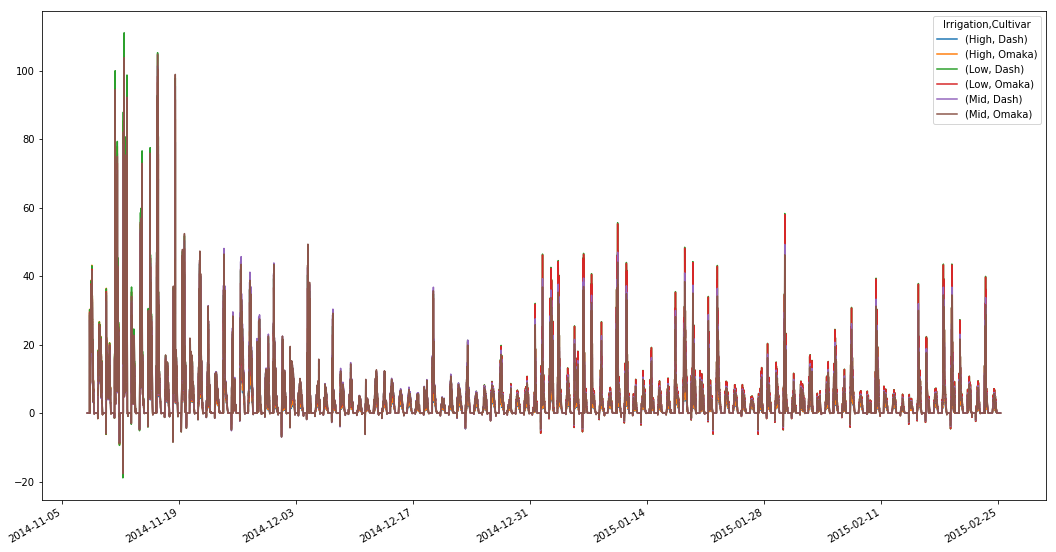

In [14]:
TsTaULDF.groupby(axis=1,level=['Irrigation','Cultivar']).mean().plot(figsize=(18,10))

## Lower limit for surface temperature depression (Ts-TaLL)

In [16]:
TsTaLLDF = pd.DataFrame(index = Data.index,columns=Height.columns)
SortFrame(TsTaLLDF)
for plot in TsTaLLDF.columns:
    TsTaLLDF.loc[:,plot] = [et.TsTaLL(RaDF.loc[x,plot],
                                   Icl,
                                  Data.loc[x,'RnW'][0],
                                  Data.loc[x,'q'][0],
                                  Cp,
                                  Data.loc[x,'gamma'][0],
                                  Data.loc[x,'delta'][0],
                                  Data.loc[x,'SatVP'][0],
                                  Data.loc[x,'VP'][0]) for x in Data.index]

In [17]:
Data[('TsTaLL','Expt','Expt','Expt')] = [et.TsTaLL(Data.loc[x,'Ra'][0],
                                  Icl,
                                  Data.loc[x,'RnW'][0],
                                  Data.loc[x,'q'][0],
                                  Cp,
                                  Data.loc[x,'gamma'][0],
                                  Data.loc[x,'delta'][0],
                                  Data.loc[x,'SatVP'][0],
                                  Data.loc[x,'VP'][0]) for x in Data.index]

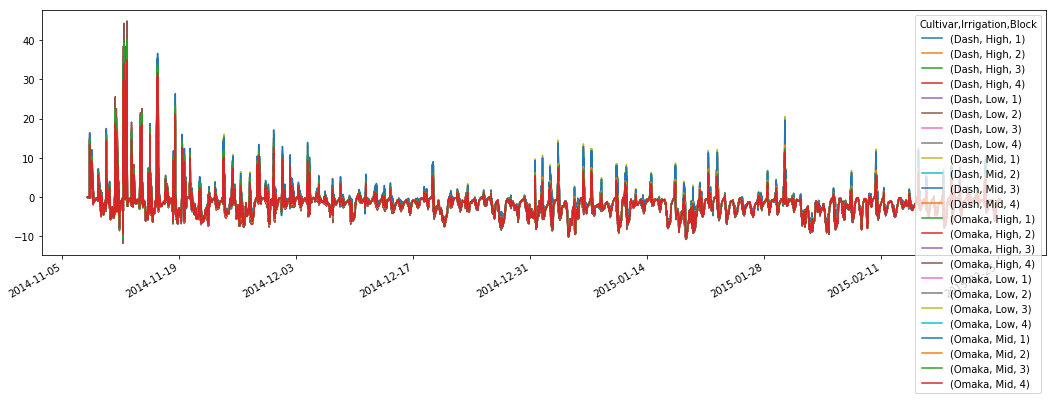

In [18]:
TsTaLLDF.plot(figsize=(18,5))

In [21]:
TempBounds = TsTaULDF.join(Data.TsTaLL)

In [22]:
TsTaULDF.to_pickle('.\DataFrames\TsTaULDF.pkl')
TsTaLLDF.to_pickle('.\DataFrames\TsTaLLDF.pkl')

In [23]:
RaDF.to_pickle('.\DataFrames\RaDF.pkl')